Gráfico de la matriz X como un colormap.

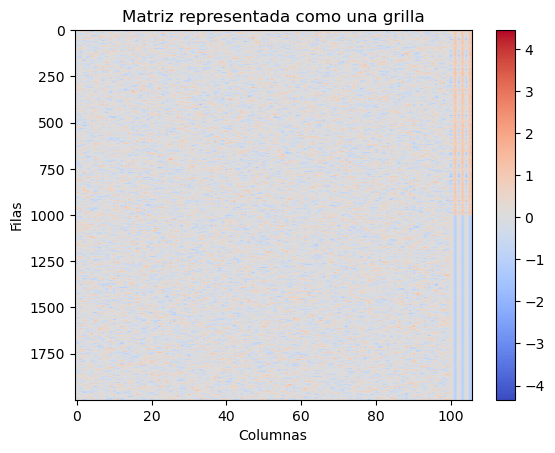

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('dataset.csv', header=None)

df = df.iloc[1:, 1:]

matriz = df.values

plt.imshow(matriz, cmap='coolwarm', aspect='auto')
plt.colorbar()  # Añadir una barra de color para mostrar el gradiente
plt.title('Matriz representada como una grilla')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.show()

Matriz X centrada: 

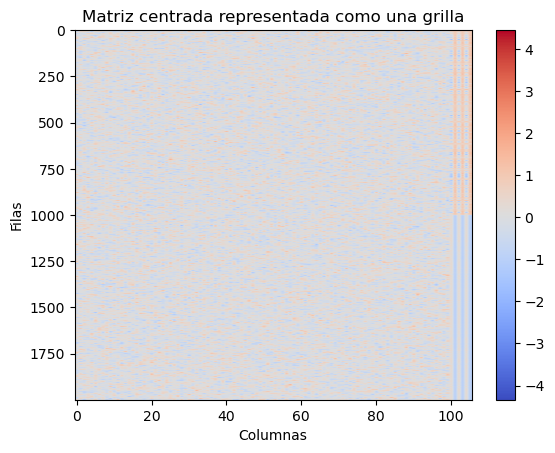

In [3]:
def center_matrix(matrix):
    """
    Función que recibe una matriz y resta a cada columna el promedio de los valores que se encuentran en esa columna.
    """
    for i in range(matrix.shape[1]):
        matrix[:, i] -= np.mean(matrix[:, i])
    return matrix


matriz_cent = center_matrix(matriz)

plt.imshow(matriz_cent, cmap='coolwarm', aspect='auto')
plt.colorbar()  # Añadir una barra de color para mostrar el gradiente
plt.title('Matriz centrada representada como una grilla')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.show()

Descomposición SVD de la matriz X centrada: 

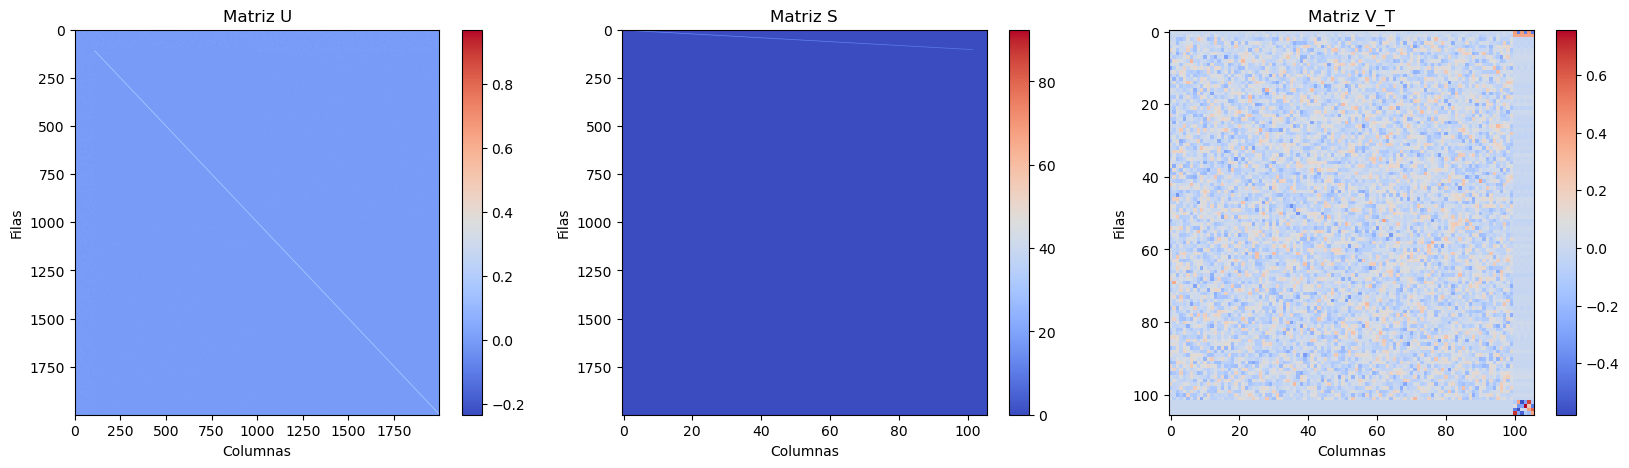

In [14]:
u, s, v_T = np.linalg.svd(matriz_cent)

# Rellenar de 0 la matriz S
sigma = np.zeros((u.shape[1], v_T.shape[0]))
np.fill_diagonal(sigma, s)

# Gráfico de las matrices U, S y V_T
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(u, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Matriz U')
plt.xlabel('Columnas')
plt.ylabel('Filas')

plt.subplot(1, 3, 2)
plt.imshow(sigma, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Matriz S')
plt.xlabel('Columnas')
plt.ylabel('Filas')

plt.subplot(1, 3, 3)
plt.imshow(v_T, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Matriz V_T')
plt.xlabel('Columnas')
plt.ylabel('Filas')

plt.show()




Gráficos de la matriz X tras la reducción de la dimensionalidad con d = 2.

In [13]:
#Recortar las matrices U, S y V_T

def truncate_svd(u, s, v_T, k):
    """
    Función que recibe las matrices U, S y V_T de una descomposición SVD y un número k, y retorna las matrices U, S y V_T
    truncadas a las primeras k columnas.
    """
    return u[:, :k], np.diag(s[:k]), v_T[:k, :]
k = 2
u_k, s_k, v_T_k = truncate_svd(u, s, v_T, k)

# Reconstruir la matriz original
matriz_rec = u_k @ s_k @ v_T_k

plt.imshow(matriz_rec, cmap='coolwarm', aspect='auto')
plt.colorbar()  # Añadir una barra de color para mostrar el gradiente
plt.title('Matriz reconstruida representada como una grilla')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.show()


NameError: name 'sigma' is not defined